In [3]:
import pandas as pd
from nltk.corpus import stopwords
import re
import string
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('coronavirustweets.csv', encoding = 'latin')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [5]:
df['Sentiment'] = df['Sentiment'].str.replace('Extremely Negative','Negative')

In [6]:
df['Sentiment'] = df['Sentiment'].str.replace('Extremely Positive','Positive')

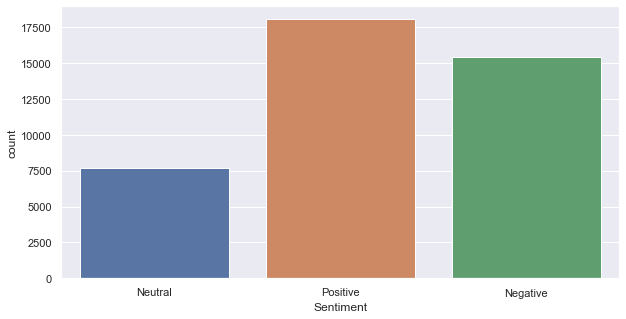

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(df['Sentiment'])

In [8]:
def clean_text(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [9]:
df.rename(columns={'OriginalTweet': 'text'}, inplace=True)
df.head()

,UserName,ScreenName,Location,TweetAt,text,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative


In [10]:
more_words=['say','going','like','U','u', 'http','https','url','today','hey','amp','...','apr','zip','pm']

def clean_data(df):
    df = df.dropna()
    df.isna().sum()
    df['text'] = df['text'].apply(lambda x: clean_text(x))
    df['text'] = df['text'].apply(lambda x: remove_emoji(x))
    df['text'] = df['text'].str.lower()
    stop_words=set(stopwords.words('english')) #nltk package
    stop_words.update(more_words)
    remove_words=lambda x: ' '.join([word for word in x.split() if word not in stop_words]) #.join is from package string
    df['text'] = df['text'].apply(remove_words)
    return df

In [11]:
df = clean_data(df)
df.head()

,UserName,ScreenName,Location,TweetAt,text,Sentiment
0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news regionâs first confirmed case came sulli...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier grocery store sharing insights prove c...,Positive


In [12]:
df['text'].apply(lambda x:len(str(x).split())).max()

38

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=0, stratify = df.Sentiment.values) 
print("Train shape : ", train.shape)
print("Test shape : ", test.shape)

Train shape :  (26053, 6)
Test shape :  (6514, 6)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.text.values)
X_test = vectorizer.transform(test.text.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (26053, 42717)
X_test.shape :  (6514, 42717)
y_train.shape :  (26053,)
y_test.shape :  (6514,)


### Naive Bayes Model

In [16]:
from sklearn.naive_bayes import MultinomialNB
naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("testing accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.821210609142901
testing accuracy Score :  0.6645686214307646
              precision    recall  f1-score   support

    Negative       0.73      0.67      0.70      2619
     Neutral       0.18      0.70      0.29       318
    Positive       0.82      0.66      0.73      3577

    accuracy                           0.66      6514
   macro avg       0.58      0.68      0.57      6514
weighted avg       0.75      0.66      0.69      6514



### Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.980539669135992
Testing accuracy Score :  0.7770954866441511
              precision    recall  f1-score   support

    Negative       0.78      0.80      0.79      2349
     Neutral       0.68      0.64      0.66      1317
    Positive       0.82      0.82      0.82      2848

    accuracy                           0.78      6514
   macro avg       0.76      0.75      0.76      6514
weighted avg       0.78      0.78      0.78      6514



### Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9998848501132307
Testing accuracy Score :  0.7450107460853547
              precision    recall  f1-score   support

    Negative       0.72      0.77      0.75      2251
     Neutral       0.67      0.65      0.66      1282
    Positive       0.79      0.77      0.78      2981

    accuracy                           0.75      6514
   macro avg       0.73      0.73      0.73      6514
weighted avg       0.75      0.75      0.74      6514



### Support Vector Machine Model

In [19]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Testing accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9489118335700303
Testing accuracy Score :  0.7474669941664108
              precision    recall  f1-score   support

    Negative       0.74      0.77      0.75      2305
     Neutral       0.65      0.64      0.65      1247
    Positive       0.80      0.78      0.79      2962

    accuracy                           0.75      6514
   macro avg       0.73      0.73      0.73      6514
weighted avg       0.75      0.75      0.75      6514



### Stochastic Gradient Descent Model

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Testing accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9679883314781407
Testing accuracy Score :  0.7864599324531778
              precision    recall  f1-score   support

    Negative       0.79      0.81      0.80      2339
     Neutral       0.71      0.64      0.68      1357
    Positive       0.82      0.83      0.83      2818

    accuracy                           0.79      6514
   macro avg       0.77      0.76      0.77      6514
weighted avg       0.78      0.79      0.79      6514



### Extreme Gradient Boosting Model

In [21]:
import xgboost as xgb
xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Testing accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

[12:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy Score    :  0.8105784362645376
Testing accuracy Score :  0.7551427694197114
              precision    recall  f1-score   support

    Negative       0.72      0.81      0.76      2138
     Neutral       0.75      0.61      0.67      1511
    Positive       0.79      0.79      0.79      2865

    accuracy                           0.76      6514
   macro avg       0.75      0.74      0.74      6514
weighted avg       0.76      0.76      0.75      6514



### Comparison of accuracy

In [23]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 
              'Random Forest', 'Support Vector Machines', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [NB_accuracy, logreg_accuracy, 
              rf_accuracy, svc_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
4,Stochastic Gradient Decent,0.786460
1,Logistic Regression,0.777095
5,XGBoost,0.755143
3,Support Vector Machines,0.747467
2,Random Forest,0.745011
0,Naive Bayes,0.664569
